<a href="https://colab.research.google.com/github/Sohammhatre10/Predicto/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
data = ('BTC-INR.csv')
df = pd.read_csv(data)

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 34.4 MB/s eta 0:0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3239 non-null   object 
 1   Open       3239 non-null   float64
 2   High       3239 non-null   float64
 3   Low        3239 non-null   float64
 4   Close      3239 non-null   float64
 5   Adj Close  3239 non-null   float64
 6   Volume     3239 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 177.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3.239000e+03,3.239000e+03,3.239000e+03,3.239000e+03,3.239000e+03,3.239000e+03
mean,1.027038e+06,1.051518e+06,1.000466e+06,1.027641e+06,1.027641e+06,1.235645e+12
std,1.211659e+06,1.241012e+06,1.178551e+06,1.211522e+06,1.211522e+06,1.458528e+12
min,1.098354e+04,1.309874e+04,1.064906e+04,1.105842e+04,1.105842e+04,3.628589e+08
25%,5.177187e+04,5.223994e+04,5.159637e+04,5.186137e+04,5.186137e+04,8.806387e+09
50%,5.341527e+05,5.499438e+05,5.226903e+05,5.343747e+05,5.343747e+05,7.415702e+11
75%,1.651089e+06,1.687922e+06,1.607334e+06,1.655311e+06,1.655311e+06,2.088343e+12
max,4.993192e+06,5.109432e+06,4.920109e+06,4.994456e+06,4.994456e+06,2.582998e+13


In [ ]:
!pip install jinja2

In [ ]:
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [ ]:
df
asset = df

In [ ]:
future_days = 1
asset['Future Price'] = asset[['Close']].shift(-future_days)
asset = asset[['Close', 'Future Price']]
asset

,Close,Future Price
0,2.785164e+04,2.577412e+04
1,2.577412e+04,2.402334e+04
2,2.402334e+04,2.488181e+04
3,2.488181e+04,2.426826e+04
4,2.426826e+04,2.450312e+04
...,...,...
3234,2.395233e+06,2.406396e+06
3235,2.406396e+06,2.406235e+06
3236,2.406235e+06,2.411990e+06
3237,2.411990e+06,2.416823e+06


In [ ]:
asset_copy = asset.copy()
x_1 = np.array(asset_copy[asset_copy.columns])
x_1 = x_1[:len(asset) - future_days]
y_1 = np.array(asset_copy['Future Price'])
y_1 = y_1[:-future_days]
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1,test_size=0.15, random_state = 0, shuffle=False)

In [ ]:
train_1_data = pd.DataFrame(x_1_train, columns=asset_copy.columns)

In [ ]:
test_1_data = pd.DataFrame(x_1_test, columns=asset_copy.columns)

In [ ]:
regression_setup = setup(data=train_1_data, target='Future Price', session_id=123, use_gpu = True)

,Description,Value
0,Session id,123
1,Target,Future Price
2,Target type,Regression
3,Original data shape,"(2752, 2)"
4,Transformed data shape,"(2752, 2)"
5,Transformed train set shape,"(1926, 2)"
6,Transformed test set shape,"(826, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model=compare_models(sort='rmsle')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,23200.9106,3004509357.8457,54216.4187,0.9980,0.0368,0.0248,0.0540
knn,K Neighbors Regressor,27175.3697,4030552780.8000,62669.8875,0.9973,0.0408,0.0288,0.0730
lightgbm,Light Gradient Boosting Machine,27314.6123,4138739174.7544,63525.8018,0.9972,0.0423,0.0293,0.1020
par,Passive Aggressive Regressor,27989.8158,3889850996.9513,61791.3520,0.9974,0.0426,0.0323,0.0630
llar,Lasso Least Angle Regression,23365.1480,3013391500.8000,54289.0289,0.9980,0.0428,0.0315,0.0570
omp,Orthogonal Matching Pursuit,23365.1480,3013391500.8000,54289.0289,0.9980,0.0428,0.0315,0.0580
en,Elastic Net,23365.1492,3013391244.8000,54289.0246,0.9980,0.0428,0.0315,0.0560
lar,Least Angle Regression,23365.1480,3013391500.8000,54289.0289,0.9980,0.0428,0.0315,0.0510
lasso,Lasso Regression,23365.1492,3013391244.8000,54289.0246,0.9980,0.0428,0.0315,0.0990
lr,Linear Regression,23365.1346,3013390233.6000,54289.0172,0.9980,0.0428,0.0315,0.0920


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
model_1 = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25092.4070,3682565641.6091,60684.1465,0.9974,0.0375,0.0246
1,19225.2750,2114444282.4702,45983.0869,0.9985,0.0365,0.0251
2,25113.5311,3108868815.8305,55757.2311,0.9981,0.0368,0.0251
3,18780.8195,2655006199.1338,51526.7523,0.9981,0.0389,0.0244
4,21104.3721,2230282356.0455,47225.8653,0.9986,0.0351,0.0240
5,26783.4440,4234008981.5547,65069.2630,0.9968,0.0391,0.0260
6,19388.4695,1855367626.3665,43073.9785,0.9985,0.0329,0.0219
7,24441.3853,2580183734.3349,50795.5090,0.9985,0.0331,0.0236
8,23364.0741,2784025317.8362,52763.8638,0.9981,0.0372,0.0257


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
unseen_predictions = predict_model(model_1, data=test_1_data)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,39146.0903,3472815818.1602,58930.6017,0.9850,0.0294,0.0196


,Close,Future Price,prediction_label
0,3456816.00,3515257.50,3.463049e+06
1,3515257.50,3483957.75,3.521596e+06
2,3483957.75,3530240.75,3.490239e+06
3,3530240.75,3518457.25,3.536606e+06
4,3518457.25,3437242.75,3.524801e+06
...,...,...,...
481,2387096.25,2395233.00,2.391400e+06
482,2395233.00,2406395.75,2.399552e+06
483,2406395.75,2406234.75,2.410735e+06
484,2406234.75,2411990.25,2.410573e+06


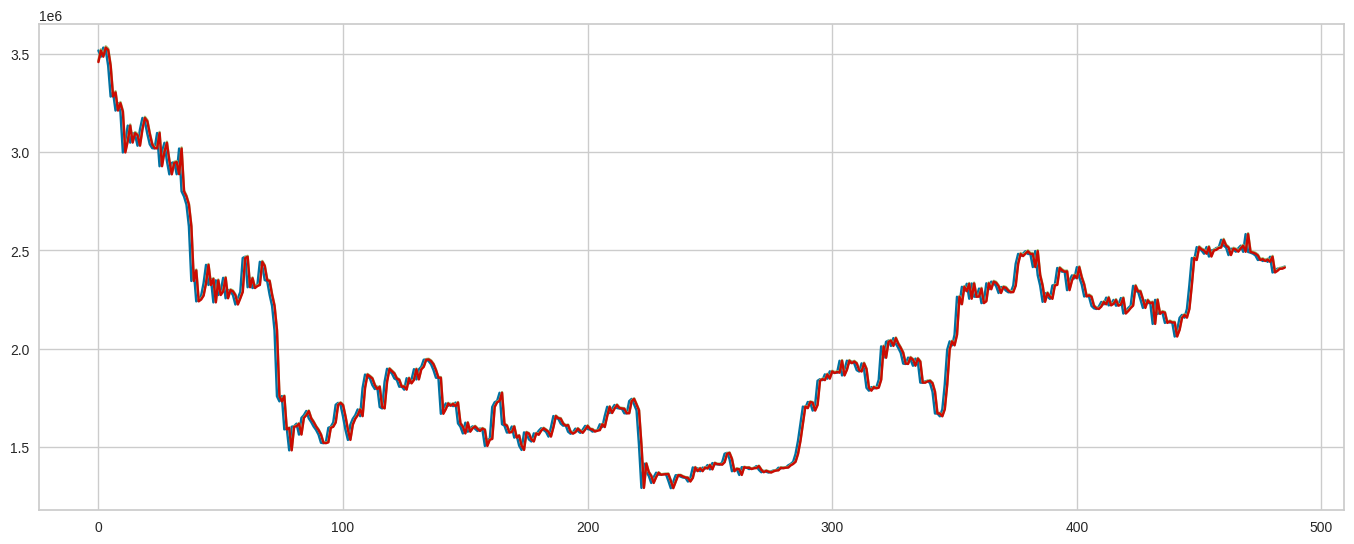

In [ ]:
plt.figure(figsize=(15,6))
unseen_predictions[r'Future Price'].plot()
unseen_predictions[r'prediction_label'].plot()
unseen_predictions[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.show()

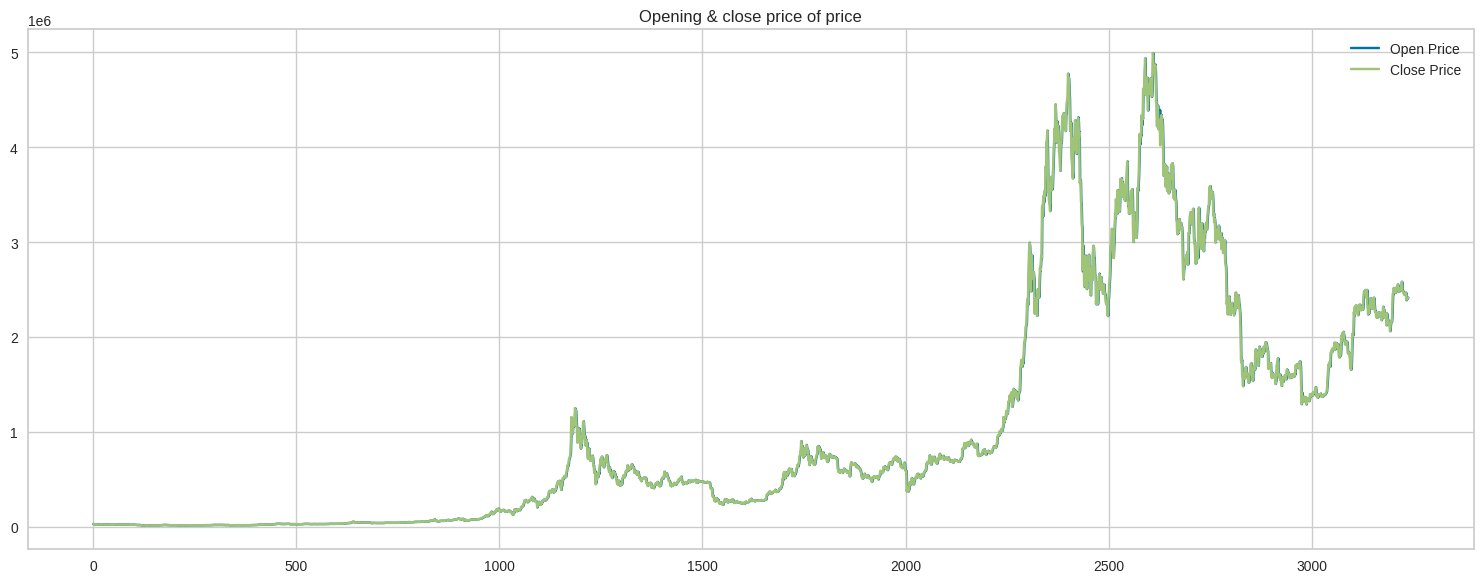

In [ ]:
plt.figure(figsize=(15,6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & close price of price')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

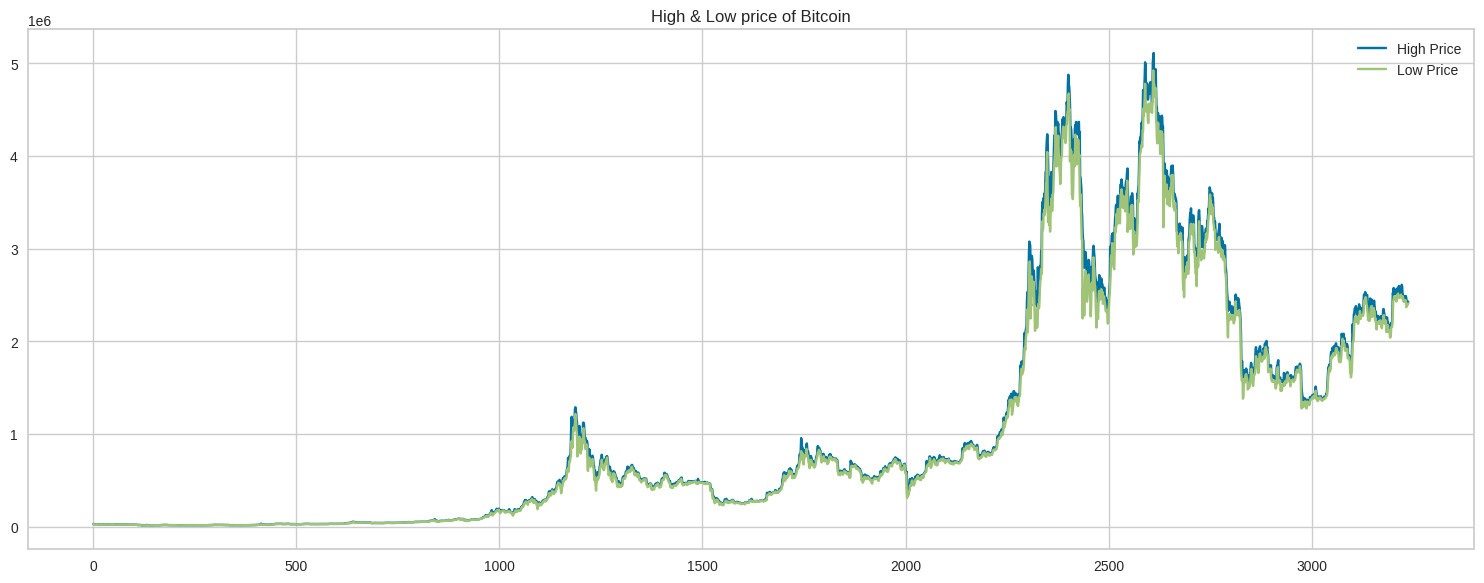

In [ ]:
plt.figure(figsize=(15,6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High & Low price of Bitcoin')
plt.legend(['High Price','Low Price'])
plt.tight_layout()
plt.show()

In [ ]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3239, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))
train_size = int(len(data) * (0.75))
test_size = len(data) - train_size
print(train_size, test_size)

2429 810


In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2429, 1)

In [ ]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1
for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i, :n_cols])
  y_train.append(train_data[i, :n_cols])
  if i<= time_steps:
    print(x_train)
    print(y_train)

[array([[0.00336983],
       [0.00295295],
       [0.00260162],
       [0.00277389],
       [0.00265077],
       [0.0026979 ],
       [0.00311881],
       [0.00295531],
       [0.00284613],
       [0.00274273],
       [0.00268255],
       [0.00240848],
       [0.00241797],
       [0.00258922],
       [0.0025313 ],
       [0.00241234],
       [0.0022202 ],
       [0.00184179],
       [0.00173861],
       [0.00185676],
       [0.00191566],
       [0.00212595],
       [0.00225203],
       [0.00222629],
       [0.00223535],
       [0.00243514],
       [0.00255948],
       [0.00271883],
       [0.00264254],
       [0.00251895],
       [0.00250535],
       [0.00259994],
       [0.0025766 ],
       [0.00248412],
       [0.00252212],
       [0.00248527],
       [0.00217971],
       [0.00217883],
       [0.00204292],
       [0.00213414],
       [0.0021223 ],
       [0.00217084],
       [0.00190732],
       [0.00203715],
       [0.00194869],
       [0.00179382],
       [0.00179558],
       [0.00

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape, y_train.shape

((2369, 60, 1), (2369, 1))

In [ ]:
model = Sequential([
    LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
75/75 [==============================] - 6s 84ms/step - loss: 4.1551e-04 - mean_absolute_error: 0.0117
Epoch 2/100
75/75 [==============================] - 5s 68ms/step - loss: 4.0109e-04 - mean_absolute_error: 0.0117
Epoch 3/100
75/75 [==============================] - 6s 80ms/step - loss: 0.0011 - mean_absolute_error: 0.0187
Epoch 4/100
75/75 [==============================] - 5s 64ms/step - loss: 2.7534e-04 - mean_absolute_error: 0.0086
Epoch 5/100
75/75 [==============================] - 6s 80ms/step - loss: 2.7851e-04 - mean_absolute_error: 0.0093
Epoch 6/100
75/75 [==============================] - 6s 74ms/step - loss: 3.0018e-04 - mean_absolute_error: 0.0096
Epoch 7/100
75/75 [==============================] - 5s 62ms/step - loss: 7.3699e-04 - mean_absolute_error: 0.0162
Epoch 8/100
75/75 [==============================] - 7s 92ms/step - loss: 2.6101e-04 - mean_absolute_error: 0.0093
Epoch 9/100
75/75 [==============================] - 5s 61ms/step - loss: 2.0224e-04

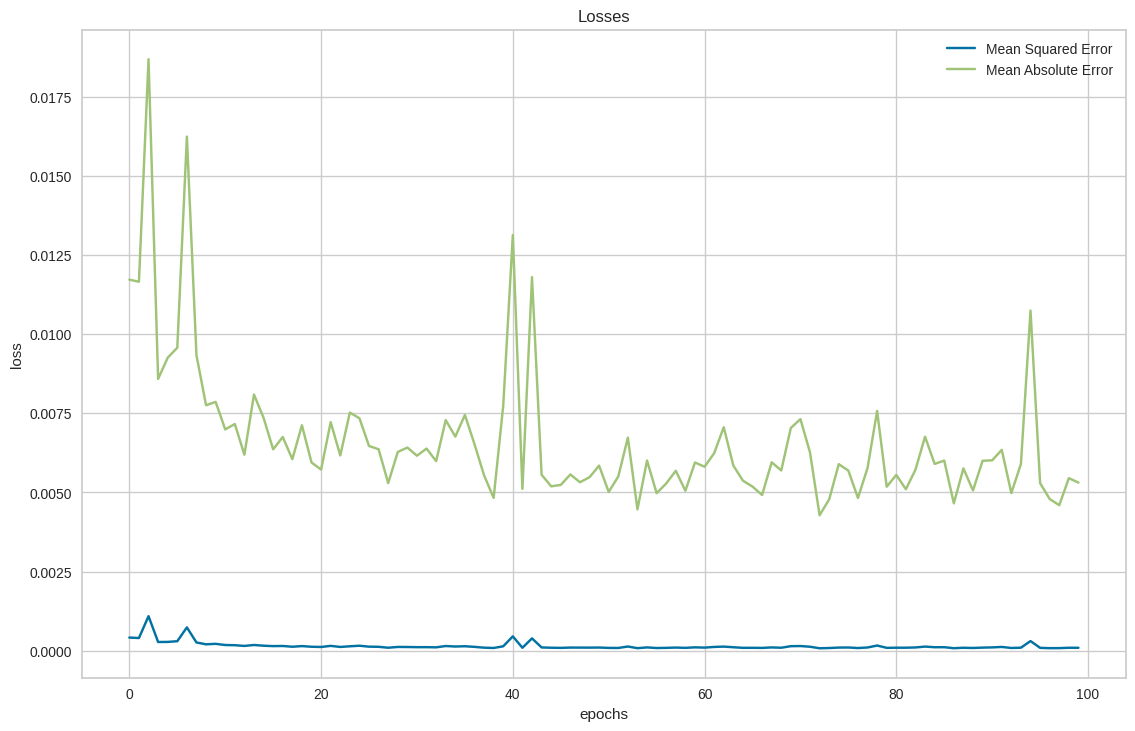

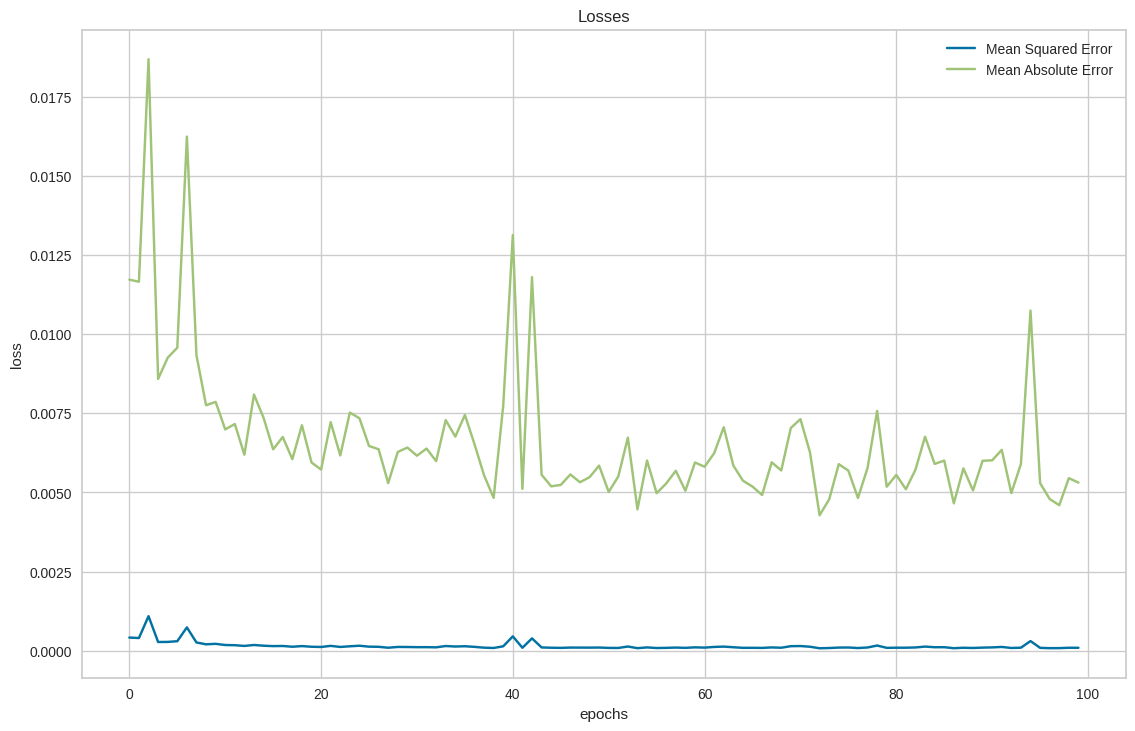

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Losses')
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.show()

In [ ]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
  x_test.append(test_data[i-time_steps:i, 0:n_cols])
  y_test.append(test_data[i,0:n_cols])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
x_test.shape, y_test.shape

((810, 60, 1), (810, 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

26/26 [==============================] - 7s 62ms/step


(810, 1)

In [ ]:
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(y_test - predictions)**2).round(2)
rmse

69713.79

In [ ]:
preds_acts = pd.DataFrame(data = {'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})

s = pd.Series([None, None])
for i in range(0,len(train_data)):
  preds_acts = preds_acts.append(s,ignore_index=True)
preds_acts

,Predictions,Actuals,0,1
0,4250409.00,3621502.00,NaN,NaN
1,3705586.00,3651423.00,NaN,NaN
2,3743096.00,3655200.50,NaN,NaN
3,3740341.00,3426544.50,NaN,NaN
4,3523701.25,3404260.75,NaN,NaN
...,...,...,...,...
3234,NaN,NaN,NaN,NaN
3235,NaN,NaN,NaN,NaN
3236,NaN,NaN,NaN,NaN
3237,NaN,NaN,NaN,NaN


In [ ]:
preds_acts['Predictions'].shift(len(train_data))

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3234    2466901.50
3235    2465906.00
3236    2475657.50
3237    2477431.75
3238    2483442.00
Name: Predictions, Length: 3239, dtype: float32

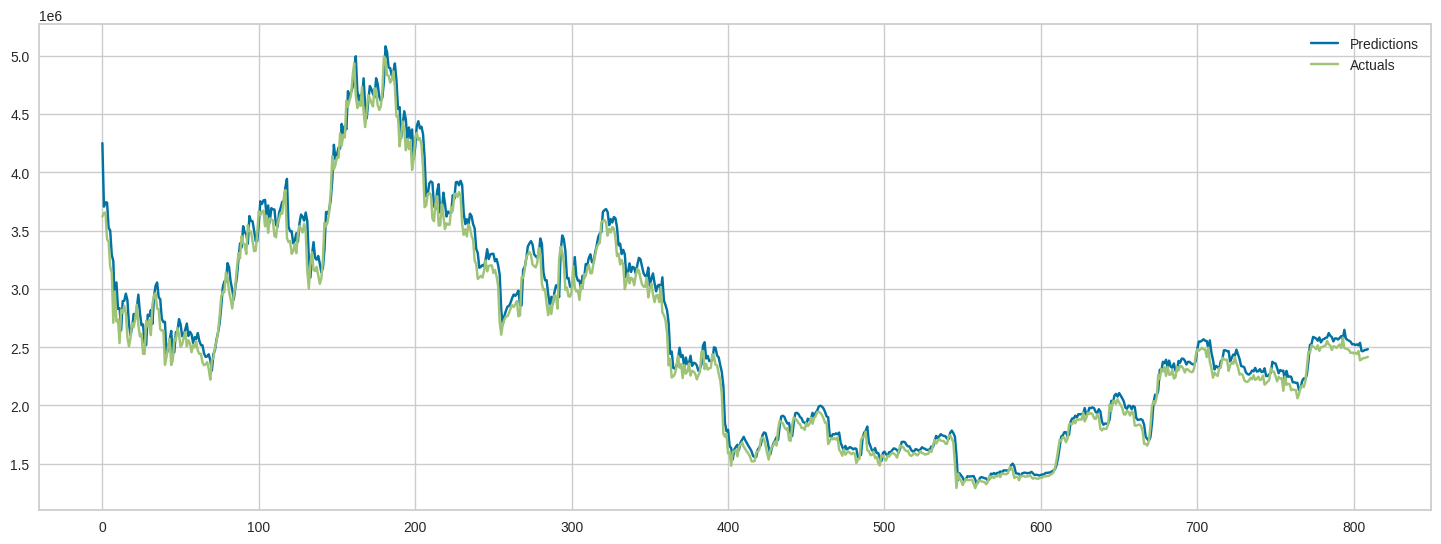

In [ ]:
plt.figure(figsize = (16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

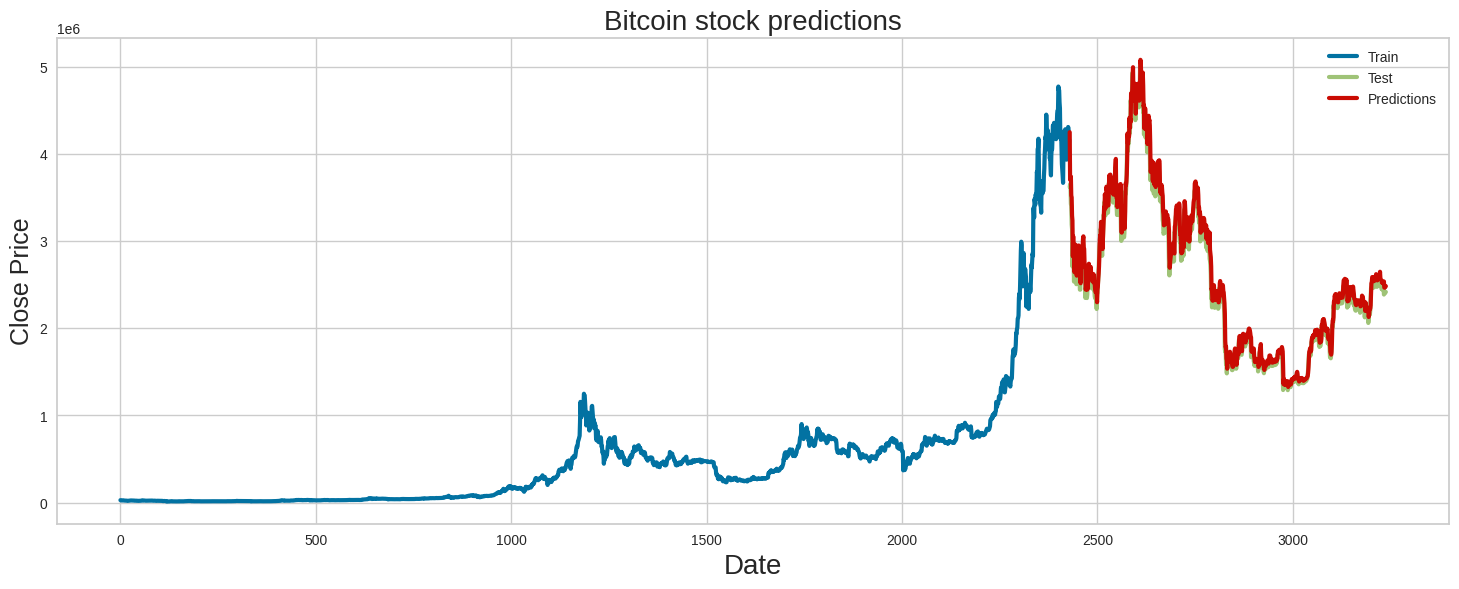

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Bitcoin stock predictions", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=18)
plt.plot(dataset.iloc[:train_size]['Close'], linewidth=3)
plt.plot(dataset.iloc[train_size:]['Close'], linewidth=3)
plt.plot(preds_acts['Predictions'].shift(len(train_data)), linewidth = 3)
plt.legend(['Train', 'Test', 'Predictions'])